# import the content

In [10]:
# import kbase
import os
local_cobrakbase_path = 'C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\Internships\\Agronne\\cobrakbase'
os.environ["HOME"] = local_cobrakbase_path
import cobrakbase
token = 'H6SZTTVQGYLKE55YLU5AOZ24OJWLKZNW'
kbase = cobrakbase.KBaseAPI(token)

# import cFBA
%run ../../TFA/ModelSEEDpy/modelseedpy/core/mscommunity.py
%matplotlib inline

# Sans media

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
species 1 drain-flux objective value: 0.0
species 2 drain-flux objective value: 0.0
Objective
1.0 bio1 = 119.41581179507449

Uptake
------
 Metabolite       Reaction   Flux  C-Number C-Flux
cpd00007_e0 EX_cpd00007_e0   1000         0  0.00%
cpd00017_e0 EX_cpd00017_e0   1000        15 47.09%
cpd00023_e0 EX_cpd00023_e0  462.4         5  7.26%
cpd00024_e0 EX_cpd00024_e0  5.228         5  0.08%
cpd00027_e0 EX_cpd00027_e0   1000         6 18.84%
cpd00028_e0 EX_cpd00028_e0 0.3351        34  0.04%
cpd00030_e0 EX_cpd00030_e0 0.3351         0  0.00%
cpd00033_e0 EX_cpd00033_e0  36.08         2  0.23%
cpd00034_e0 EX_cpd00034_e0 0.3351         0  0.00%
cpd00039_e0 EX_cpd00039_e0  34.09         6  0.64%
cpd00042_e0 EX_cpd00042_e0  5.049        10  0.16%
cpd00048_e0 EX_cpd00048_e0 0.3351         0  0.00%
cpd00051_e0 EX_cpd00051_e0  29.46         6  0.55%
cpd00053_e0 EX_cpd00053_e0  74.88         5  1.18%
cpd00054_e0 EX_cpd00054_e0  

,fluxes,reduced_costs
rxn02342_c1,0.000000,0.000000e+00
rxn08734_c1,0.000000,0.000000e+00
rxn00199_c1,0.000000,0.000000e+00
rxn10126_c1,0.000000,2.220446e-16
rxn05040_c1,0.000000,0.000000e+00
...,...,...
EX_cpd03453_e0,0.000000,0.000000e+00
EX_cpd00254_e0,-0.335100,0.000000e+00
SK_cpd11416_c0,119.415812,0.000000e+00
DM_cpd11416_c1,0.000000,-3.999962e+00


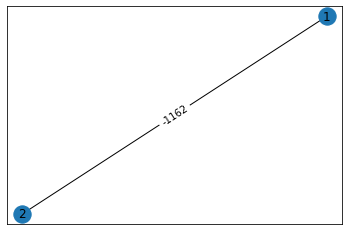

In [20]:
%run ../../TFA/ModelSEEDpy/modelseedpy/core/mscommunity.py
from optlang.symbolics import Zero

# from modelseedpy.fbapkg import kbasemediapkg
modelInfo_2 = ['Cjaponicus_Ecoli_Community',97055]
# if 'DM_cpd11416_c1' in [reaction.id for reaction in model.reactions]:
#     print(True)
# else:
#     print(False)
mediaInfo_2 = ["GlucoseM9Media",97055]
model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes()
cfba.constrain() 
cfba.gapfill()
solution = cfba.run(summary = True)
cfba.compute_interactions(solution)
cfba.visualize()

display(model.optimize())

# community model 

### glucose media

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
species 1 drain-flux objective value: 0.0
species 2 drain-flux objective value: 0.0


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
modelseedpy.core.msgapfill - WARNING - No solution found for <cobrakbase.core.kbasebiochem.media.Media object at 0x00000209C4C6C088>



--> ERROR: The simulation lacks a solution, and cannot be gapfilled.

Objective
1.0 bio1 = 119.41581179507449

Uptake
------
 Metabolite       Reaction   Flux  C-Number C-Flux
cpd00007_e0 EX_cpd00007_e0   1000         0  0.00%
cpd00017_e0 EX_cpd00017_e0   1000        15 47.09%
cpd00023_e0 EX_cpd00023_e0  462.4         5  7.26%
cpd00024_e0 EX_cpd00024_e0  5.228         5  0.08%
cpd00027_e0 EX_cpd00027_e0   1000         6 18.84%
cpd00028_e0 EX_cpd00028_e0 0.3351        34  0.04%
cpd00030_e0 EX_cpd00030_e0 0.3351         0  0.00%
cpd00033_e0 EX_cpd00033_e0  36.08         2  0.23%
cpd00034_e0 EX_cpd00034_e0 0.3351         0  0.00%
cpd00039_e0 EX_cpd00039_e0  34.09         6  0.64%
cpd00042_e0 EX_cpd00042_e0  5.049        10  0.16%
cpd00048_e0 EX_cpd00048_e0 0.3351         0  0.00%
cpd00051_e0 EX_cpd00051_e0  29.46         6  0.55%
cpd00053_e0 EX_cpd00053_e0  74.88         5  1.18%
cpd00054_e0 EX_cpd00054_e0  61.91         3  0.58%
cpd00058_e0 EX_cpd00058_e0 0.3351         0  0.00%
cpd0006

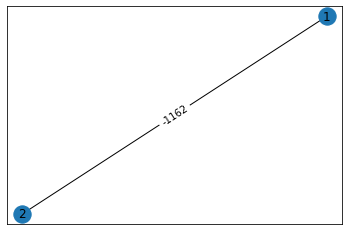

In [22]:
# import the model
%run ../../TFA/ModelSEEDpy/modelseedpy/core/mscommunity.py
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['Cjaponicus_Ecoli_Community',97055]
mediaInfo_2 = ["GlucoseM9Media",97055]
model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes()
cfba.gapfill(media)
cfba.constrain(media)

# operational sections
solution = cfba.run(summary = True)
cfba.compute_interactions(solution)
cfba.visualize()

### chitin media

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
species 1 drain-flux objective value: 0.0
species 2 drain-flux objective value: 0.0
Objective
1.0 bio1 = 0.0

Uptake
------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []

Secretion
---------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []



C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
modelseedpy.core.msgapfill - WARNING - No solution found for <cobrakbase.core.kbasebiochem.media.Media object at 0x00000209CDC01448>



--> ERROR: The simulation lacks a solution, and cannot be gapfilled.

Objective
1.0 bio1 = 0.0

Uptake
------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []

Secretion
---------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []


Production matrix:
         1    2
Donor          
1      0.0  0.0
2      0.0  0.0


Consumption matrix:
            1    2
Receiver          
1         0.0  0.0
2         0.0  0.0


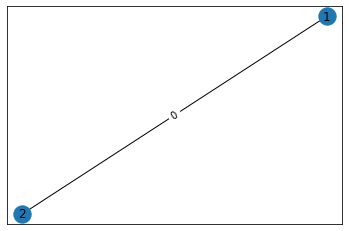

In [23]:
# import the model
%run ../../TFA/ModelSEEDpy/modelseedpy/core/mscommunity.py
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['Cjaponicus_Ecoli_Community',97055]
mediaInfo_2 = ["ChitinM9Media",97055]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes()
cfba.constrain(media) 
solution = cfba.run(summary = True)
cfba.gapfill(media)
solution = cfba.run(summary = True)
cfba.compute_interactions(solution)
cfba.visualize()

# individual models

## Cjaponicus

### Glucose media

Objective
1.0 bio1 = 1.3379027533633645

Uptake
------
 Metabolite       Reaction     Flux  C-Number  C-Flux
cpd00007_e0 EX_cpd00007_e0     4.26         0   0.00%
cpd00009_e0 EX_cpd00009_e0    1.087         0   0.00%
cpd00013_e0 EX_cpd00013_e0     11.7         0   0.00%
cpd00027_e0 EX_cpd00027_e0       10         6 100.00%
cpd00030_e0 EX_cpd00030_e0 0.003754         0   0.00%
cpd00034_e0 EX_cpd00034_e0 0.003754         0   0.00%
cpd00048_e0 EX_cpd00048_e0   0.3029         0   0.00%
cpd00058_e0 EX_cpd00058_e0 0.003754         0   0.00%
cpd00063_e0 EX_cpd00063_e0 0.003754         0   0.00%
cpd00099_e0 EX_cpd00099_e0 0.003754         0   0.00%
cpd00149_e0 EX_cpd00149_e0 0.003754         0   0.00%
cpd00205_e0 EX_cpd00205_e0 0.003754         0   0.00%
cpd00254_e0 EX_cpd00254_e0 0.003754         0   0.00%
cpd10515_e0 EX_cpd10515_e0  0.01502         0   0.00%
cpd17041_c0    rxn13782_c0    1.338         0   0.00%
cpd17042_c0    rxn13783_c0    1.338         0   0.00%
cpd17043_c0    rxn13784_c0 

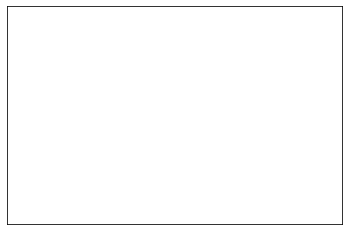

In [24]:
# import the model
%run ../../TFA/ModelSEEDpy/modelseedpy/core/mscommunity.py
modelInfo_2 = ['Cjaponicus_gF4b_Model',97055]
mediaInfo_2 = ["GlucoseM9Media",97055]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes()
cfba.constrain(media) 
cfba.gapfill(media)
solution = cfba.run(summary = True)
cfba.compute_interactions(solution)
cfba.visualize()

### Chitin media

Objective
1.0 bio1 = 1.9450240202880626

Uptake
------
 Metabolite       Reaction     Flux  C-Number  C-Flux
cpd00007_e0 EX_cpd00007_e0  0.04366         0   0.00%
cpd00009_e0 EX_cpd00009_e0     1.58         0   0.00%
cpd00013_e0 EX_cpd00013_e0     7.01         0   0.00%
cpd00030_e0 EX_cpd00030_e0 0.005458         0   0.00%
cpd00034_e0 EX_cpd00034_e0 0.005458         0   0.00%
cpd00048_e0 EX_cpd00048_e0   0.4403         0   0.00%
cpd00058_e0 EX_cpd00058_e0 0.005458         0   0.00%
cpd00063_e0 EX_cpd00063_e0 0.005458         0   0.00%
cpd00067_e0 EX_cpd00067_e0    14.31         0   0.00%
cpd00099_e0 EX_cpd00099_e0 0.005458         0   0.00%
cpd00149_e0 EX_cpd00149_e0 0.005458         0   0.00%
cpd00205_e0 EX_cpd00205_e0 0.005458         0   0.00%
cpd00254_e0 EX_cpd00254_e0 0.005458         0   0.00%
cpd10515_e0 EX_cpd10515_e0  0.02183         0   0.00%
cpd11683_e0 EX_cpd11683_e0       10         8 100.00%
cpd17041_c0    rxn13782_c0    1.945         0   0.00%
cpd17042_c0    rxn13783_c0 

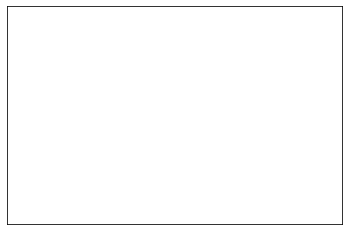

In [25]:
# import the model
%run ../../TFA/ModelSEEDpy/modelseedpy/core/mscommunity.py
modelInfo_2 = ['Cjaponicus_gF4b_Model',97055]
mediaInfo_2 = ["ChitinM9Media",97055]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes()
cfba.constrain(media) 
cfba.gapfill(media)
solution = cfba.run(summary = True)
cfba.compute_interactions(solution)
cfba.visualize()

## E coli

### Glucose media

Objective
1.0 bio1 = 1.5205175619509839

Uptake
------
 Metabolite       Reaction     Flux  C-Number  C-Flux
cpd00007_e0 EX_cpd00007_e0  0.01707         0   0.00%
cpd00009_e0 EX_cpd00009_e0    1.236         0   0.00%
cpd00013_e0 EX_cpd00013_e0    13.05         0   0.00%
cpd00027_e0 EX_cpd00027_e0       10         6 100.00%
cpd00030_e0 EX_cpd00030_e0 0.004267         0   0.00%
cpd00034_e0 EX_cpd00034_e0 0.004267         0   0.00%
cpd00048_e0 EX_cpd00048_e0   0.3442         0   0.00%
cpd00058_e0 EX_cpd00058_e0 0.004267         0   0.00%
cpd00063_e0 EX_cpd00063_e0 0.004267         0   0.00%
cpd00067_e0 EX_cpd00067_e0     11.9         0   0.00%
cpd00099_e0 EX_cpd00099_e0 0.004267         0   0.00%
cpd00149_e0 EX_cpd00149_e0 0.004267         0   0.00%
cpd00205_e0 EX_cpd00205_e0 0.004267         0   0.00%
cpd00254_e0 EX_cpd00254_e0 0.004267         0   0.00%
cpd10515_e0 EX_cpd10515_e0  0.01707         0   0.00%
cpd17041_c0    rxn13782_c0    1.521         0   0.00%
cpd17042_c0    rxn13783_c0 

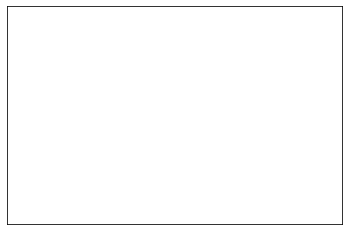

In [7]:
# import the model
%run ../../TFA/ModelSEEDpy/modelseedpy/core/mscommunity.py
modelInfo_2 = ['Ecoli_gF4_Model',97055]
mediaInfo_2 = ["GlucoseM9Media",97055]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes()
cfba.constrain(media) 
cfba.gapfill(media)
solution = cfba.run(summary = True)
cfba.compute_interactions(solution)
cfba.visualize()

### Chitin media

C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
modelseedpy.core.msgapfill - WARNING - No solution found for <cobrakbase.core.kbasebiochem.media.Media object at 0x00000209C54754C8>



--> ERROR: The simulation lacks a solution, and cannot be gapfilled.

Objective
1.0 bio1 = 0.0

Uptake
------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []

Secretion
---------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []


Production matrix:
Empty DataFrame
Columns: []
Index: []


Consumption matrix:
Empty DataFrame
Columns: []
Index: []


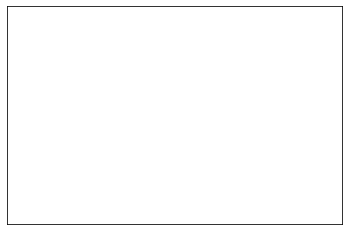

In [26]:
# import the model
%run ../../TFA/ModelSEEDpy/modelseedpy/core/mscommunity.py
modelInfo_2 = ['Ecoli_gF4_Model',97055]
mediaInfo_2 = ["ChitinM9Media",97055]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes()
cfba.constrain(media) 
cfba.gapfill(media)
solution = cfba.run(summary = True)
cfba.compute_interactions(solution)
cfba.visualize()

# Brainstorming

In [18]:
via_string = []
for reaction in model.reactions:
    if reaction.id[:3] == 'EX_':
        via_string.append(reaction.id)

via_attribute = []
for reaction in model.exchanges:
    if reaction.id[:3] == 'EX_':
        via_attribute.append(reaction.id)
    
print(set(via_attribute) -  set(via_string))
print(set(via_string) == set(via_attribute))

set()
True
